# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Number of Marketing Campaingns the Data Represents...

Its found from the The "Portugese Banking Data" it represents 17 marketing campaigns conducted between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
#######################################################################################################################
# Iports of Lbraries and other packages we will use. 
# For Plotting part of the project we will have the imports included later in this project.
# That way we can have some clarity at various sections of this practical work project
#######################################################################################################################
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
#######################################################################################################################
# Some basic operations of Reading the CSV and see how many rows and columns it entails for the work
#######################################################################################################################
df = pd.read_csv('../data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective of the Assignment is to...

Is to predict whether a bank client will subscribe to a term deposit based on information obtained during direct marketing campaigns like 
phone calls, along with demographic and economic context data.

In [4]:
#######################################################################################################################
# The Data we will be dealing with
########################################################################################################################
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#######################################################################################################################
# Operating on the Data
# Cleaning up the Data a Bit. Replacing, Drop, Substitute, Convert are the operations we will do here. Before we 
# Fit, Test and Model the data
#######################################################################################################################
# Replace 'unknown' with NaN (optional, useful for advanced imputation)
df.replace('unknown', pd.NA, inplace=True)
# Drop 'duration' as it is only known after the call
if 'duration' in df.columns:
    df.drop(columns=['duration'], inplace=True)
# Create a new binary feature: was_previously_contacted
df['was_previously_contacted'] = (df['pdays'] != 999).astype(int)
# Optional: replace pdays == 999 with a neutral value (e.g., -1)
df['pdays'] = df['pdays'].replace(999, -1)
# Convert target variable to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df.drop(columns=['y'])
y = df['y']
#df.info()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,was_previously_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
#######################################################################################################################
# Convert categorical columns to category dtype
########################################################################################################################
categorical_cols = X.select_dtypes(include='object').columns
X[categorical_cols] = X[categorical_cols].astype('category')

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
#######################################################################################################################
# X_train_scaled, X_test_scaled: To get ready for KNN, SVM, logistic regression modeling
# Decision Tree don't need scaling - X_train and X_test directly for decision trees
########################################################################################################################
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [8]:
#######################################################################################################################
#The target variable y has two classes:
#'yes' → client subscribed to term deposit
#'no' → client did not subscribe
#To Establish the baseline, we check which class is most frequent and what percentage it represents.
#######################################################################################################################
baseline_accuracy = y.value_counts(normalize=True).max()
majority_class = y.value_counts().idxmax()

print(f"Majority Class: {majority_class}")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Majority Class: 0
Baseline Accuracy: 0.8873


In [9]:
#######################################################################################################################
# We will use a common empty list and we will fill this list with the type of Model we utilize and how much time does it 
# take to fit the Model.
# We will fill in the  'Model': Name, 'Train-Time', 'Train-Accuracy', 'Test-Accuracy'
########################################################################################################################
results_fit_time = []

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
#######################################################################################################################
# Logistic Regression : is a supervised machine learning algorithm used for classification problems. 
# It predicts the probability that an input belongs to a specific class. It is used for binary classification where 
# the output can be one of two possible categories such as Yes/No, True/False or 0/1. 
# It uses sigmoid function to convert inputs into a probability value between 0 and 1.
# Accuracy, Precision, Recall and F1 Scores are computed along with Confusion Matrix
########################################################################################################################
start = time.time()
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_scaled, y_train)
end = time.time()

y_pred_lr = model_lr.predict(X_test_scaled)

results_fit_time.append({
    'Model': 'Logistic Regression',
    'Train-Time': round(end - start, 4),
    'Train-Accuracy': accuracy_score(y_train, model_lr.predict(X_train_scaled)),
    'Test-Accuracy': accuracy_score(y_test, model_lr.predict(X_test_scaled)),
    'F1-Score': f1_score(y_test, y_pred_lr)
})
print("Logistic Regression")

Logistic Regression


### Problem 9: Score the Model

What is the accuracy of your model?

In [11]:
########################################################################################################################
# Computing Various Scores from the Logistic Regression: Accuracy, Precision, Recall and F1 Scores are computed along 
# with Confusion Matrix
########################################################################################################################
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1-Score :", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy : 0.9013109978150037
Precision: 0.6923076923076923
Recall   : 0.22306034482758622
F1-Score : 0.3374083129584352
Confusion Matrix:
 [[7218   92]
 [ 721  207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [12]:
#######################################################################################################################
# KNN Regression Model is based on K-Nearest Neighbours
# This value is the average of the values of k nearest neighbors. 
# If k = 1, then the output is simply assigned to the value of that single nearest neighbor, 
# also known as nearest neighbor interpolation
# Logistic Regression outperforms KNN
# Also Compute Various Scores from the KNN Regression: Accuracy, Precision, Recall and F1 Scores are computed along 
# with Confusion Matrix
#######################################################################################################################
start = time.time()
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
end = time.time()

y_pred_knn = model_knn.predict(X_test_scaled)

results_fit_time.append({
    'Model': 'K-Nearest Neighbors',
    'Train-Time': round(end - start, 4),
    'Train-Accuracy': accuracy_score(y_train, model_knn.predict(X_train_scaled)),
    'Test-Accuracy': accuracy_score(y_test, model_knn.predict(X_test_scaled)),
    'F1-Score': f1_score(y_test, y_pred_knn)
})
print("K-Nearest Neighbors")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1-Score :", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
Accuracy : 0.8932993445010925
Precision: 0.5529157667386609
Recall   : 0.27586206896551724
F1-Score : 0.3680805176132279
Confusion Matrix:
 [[7103  207]
 [ 672  256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.55      0.28      0.37       928

    accuracy                           0.89      8238
   macro avg       0.73      0.62      0.65      8238
weighted avg       0.87      0.89      0.88      8238



In [13]:
#######################################################################################################################
# A Decision Tree for regression is a model that predicts numerical values using a tree-like structure. 
# It splits data based on key features, starting from a root question and branching out. Each node asks about a feature, 
# dividing data further until reaching leaf nodes with final predictions
# Decision Tree don't need scaling - X_train and X_test directly for decision trees
#######################################################################################################################
start = time.time()
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)  # No scaling needed
end = time.time()

y_pred_dt = model_dt.predict(X_test)

results_fit_time.append({
    'Model': 'Decision Tree',
    'Train-Time': round(end - start, 4),
    'Train-Accuracy': accuracy_score(y_train, model_dt.predict(X_train)),
    'Test-Accuracy': accuracy_score(y_test, model_dt.predict(X_test)),
    'F1-Score': f1_score(y_test, y_pred_dt)
})
print("Decision Tree")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-Score :", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy : 0.8407380432143724
Precision: 0.3128654970760234
Recall   : 0.3459051724137931
F1-Score : 0.3285568065506653
Confusion Matrix:
 [[6605  705]
 [ 607  321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7310
           1       0.31      0.35      0.33       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.62      8238
weighted avg       0.85      0.84      0.84      8238



In [14]:
#######################################################################################################################
# A Model that returns a returns a continuous-valued output instead of a set of discrete values, 
# thus regression is a generalization of the classification problem.
# This is the Support Vector Classifier from sklearn.svm. It's used for classification tasks.
# This creates an instance of a Support Vector Machine (SVM) classifier using scikit-learn's SVC 
# (Support Vector Classification) class with specific settings
# We also compute Various Scores from the SVM regression: Accuracy, Precision, Recall and F1 Scores are computed along 
# with Confusion Matrix
########################################################################################################################
model_svm = SVC(kernel='rbf', probability=True, random_state=42)

start = time.time()
model_svm.fit(X_train_scaled, y_train)
end = time.time()
y_pred_svm = model_svm.predict(X_test_scaled)

results_fit_time.append({
    'Model': 'Support Vector Machine',
    'Train-Time': round(end - start, 4),
    'Train-Accuracy': accuracy_score(y_train, model_svm.predict(X_train_scaled)),
    'Test-Accuracy': accuracy_score(y_test, model_svm.predict(X_test_scaled)),
     'F1-Score': f1_score(y_test, y_pred_svm)
})

print("Support Vector Machine")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1-Score :", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy : 0.900825443068706
Precision: 0.68561872909699
Recall   : 0.2209051724137931
F1-Score : 0.3341483292583537
Confusion Matrix:
 [[7216   94]
 [ 723  205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [15]:
#######################################################################################################################
# We compare the performances of Various models. We utilize the list where we have been storing all the performance
# results 'results_fit_time' to print the model comparision summary
########################################################################################################################
results_fit_time_df = pd.DataFrame(results_fit_time)
print("Model Comparison Summary:\n")
print(results_fit_time_df.iloc[:, :-1])

Model Comparison Summary:

                    Model  Train-Time  Train-Accuracy  Test-Accuracy
0     Logistic Regression      0.2437        0.900152       0.901311
1     K-Nearest Neighbors      0.0062        0.912382       0.893299
2           Decision Tree      0.4174        0.994719       0.840738
3  Support Vector Machine   1343.4604        0.909105       0.900825


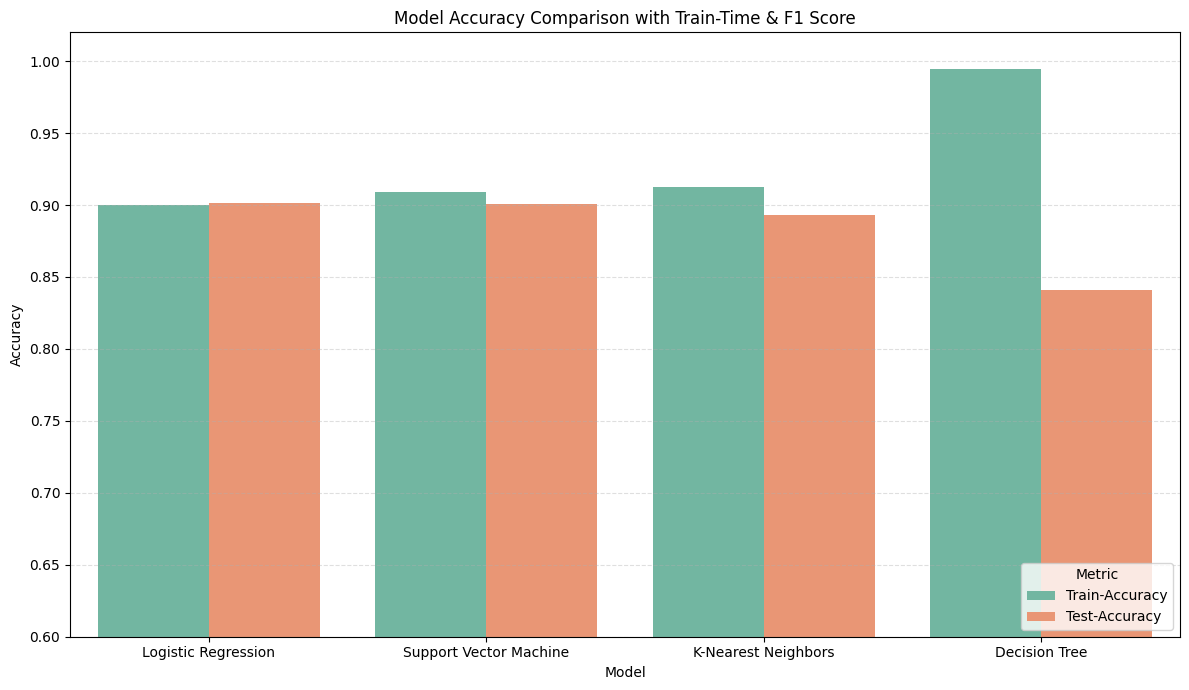

In [16]:
#######################################################################################################################
#
# Plotting the : Model_Accuracy_Comparison.png
#
#######################################################################################################################
import seaborn as sns
import matplotlib.pyplot as plt

# Sort models by test accuracy
results_df_sorted = results_fit_time_df.sort_values(by="Test-Accuracy", ascending=False)

# Melt for Seaborn barplot
melted = pd.melt(
    results_df_sorted,
    id_vars=['Model', 'Train-Time', 'F1-Score'],
    value_vars=['Train-Accuracy', 'Test-Accuracy'],
    var_name='Metric',
    value_name='Accuracy'
)
# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Model', y='Accuracy', hue='Metric', data=melted, palette='Set2')
plt.title("Model Accuracy Comparison with Train-Time & F1 Score")
plt.ylim(0.6, 1.02)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Metric', loc='lower right')
# Add train-time and F1-score annotations
for bar, (_, row) in zip(ax.patches, results_df_sorted.iterrows()):
    height = bar.get_height()
    model_index = int(bar.get_x() + bar.get_width() / 2)
    if 'Train' in bar.get_label():
        label = f"{row['Train-Time']}s\n F1: {row['F1-Score']:.2f}"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            label,
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )
plt.tight_layout()
plt.savefig("..\\GraphPlots\\Model_Accuracy_Comparison.png", dpi=300)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Feature Engineering and Exploration:

In the Bank Marketing Dataset, there is no explicit gender column. If possibly we can inferr the gender factor it could be possible from marital status.
We can KEEP a feature if:
      i)  It's available at the time of prediction
      ii) It's not a proxy for sensitive or biased info unless being handled explicitly
      iii)It adds predictive signal without causing ethical/legal issues
We can REMOVE a feature if:
      i)  It's leads to data leakage (like duration does)
      ii) It’s biased or ethically sensitive (e.g., inferred gender may raise fairness concerns)
      iii)It's redundant or low variance

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [18]:
#######################################################################################################################
#
# We do a GridSearchCV for all four models — Logistic Regression, KNN, Decision Tree, and SVM — using scikit-learn.
# Define a parameter grid for each model.
# Use F1-score as the scoring metric (to account for class imbalance).
# Use 5-fold cross-validation.
# SVM Takes a longer Time and hence skipping it.
#######################################################################################################################
def run_grid_search(model, param_grid, X_train, y_train, model_name, use_scaled=True):
    print(f"\nGridSearchCV for {model_name}")
    scorer = make_scorer(f1_score)
    
    grid = GridSearchCV(model, param_grid, scoring=scorer, cv=5, n_jobs=-1)
    grid.fit(X_train_scaled if use_scaled else X_train, y_train)
    
    print(f"Best Params for {model_name}: {grid.best_params_}")
    print(f"Best F1 Score: {grid.best_score_:.4f}")
    return grid.best_estimator_

In [19]:
#######################################################################################################################
#
# Grid Search: Logistic Regression
#
#######################################################################################################################
from sklearn.linear_model import LogisticRegression

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # supports l1 + l2
}
lr_best = run_grid_search(LogisticRegression(max_iter=1000, random_state=42), lr_param_grid, X_train_scaled, y_train, "Logistic Regression")


GridSearchCV for Logistic Regression
Best Params for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.3409


In [20]:
#######################################################################################################################
#
# Grid Search: K-Nearest Neighbors
#
#######################################################################################################################
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (1) or Euclidean (2)
}
knn_best = run_grid_search(KNeighborsClassifier(), knn_param_grid, X_train_scaled, y_train, "K-Nearest Neighbors")


GridSearchCV for K-Nearest Neighbors
Best Params for K-Nearest Neighbors: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best F1 Score: 0.3512


In [21]:
#######################################################################################################################
#
# Grid Search: Decision Tree
#
#######################################################################################################################

from sklearn.tree import DecisionTreeClassifier

dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_best = run_grid_search(DecisionTreeClassifier(random_state=42), dt_param_grid, X_train, y_train, "Decision Tree", use_scaled=False)


GridSearchCV for Decision Tree
Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best F1 Score: 0.3656


In [ ]:
#######################################################################################################################
#
# Grid Search: Support Vector Machine
#
#######################################################################################################################
'''
from sklearn.svm import SVC

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
svm_best = run_grid_search(SVC(probability=True, random_state=42), svm_param_grid, X_train_scaled, y_train, "Support Vector Machine")
'''


GridSearchCV for Support Vector Machine


In [22]:
#######################################################################################################################
#
# Hyperparameter Tuning
#
#######################################################################################################################

from sklearn.metrics import classification_report

for name, model in [('LogReg', lr_best), ('KNN', knn_best), ('DT', dt_best)]: ##, ('SVM', svm_best)
    print(f"\n{name} Test Set Evaluation")
    y_pred = model.predict(X_test_scaled if name != 'DT' else X_test)
    print(classification_report(y_test, y_pred))


LogReg Test Set Evaluation
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238


KNN Test Set Evaluation
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.53      0.27      0.36       928

    accuracy                           0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238


DT Test Set Evaluation
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.62      0.28      0.39       928

    accuracy                           0.90      8238
   macro avg       0.77      0.63      0.67      82

In [23]:
#######################################################################################################################
#
# A Common Function : For Measuring and plotting the performance of the 4 Models 
# Confusion matrix : is a simple table used to measure how well a classification model is performing. 
# Something to compare the predictions made by the model with the actual results and shows where the model was right 
# or wrong. This also helps in understanding where the model is making mistakes so that it can be improved.
##True Positive (TP): Model correctly predicted "yes"--(subscribed)
###True Negative (TN): Model correctly predicted "no"--(did not subscribe)
####False Positive (FP): Model predicted "yes" -- but actual was "no"
#####False Negative (FN): Model predicted "no"-- but actual was "yes"
####Confusion Matrix would also help reveal where each model is failing:
###Too many false negatives? We are missing real positives.
##Too many false positives? over-optimistic.
#######################################################################################################################
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name):
    strSaveFile = "..\\GraphPlots\\" +model_name+"_ConfuMatrix"+".png"
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.tight_layout()
    plt.savefig(strSaveFile, dpi=300)
    plt.show()

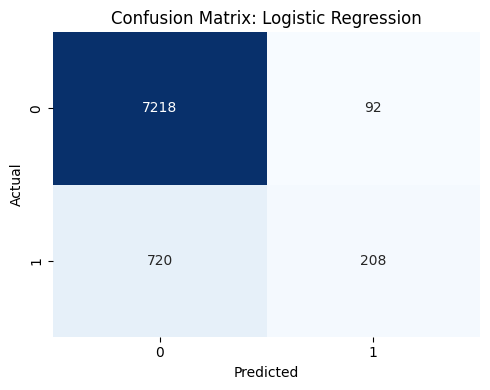

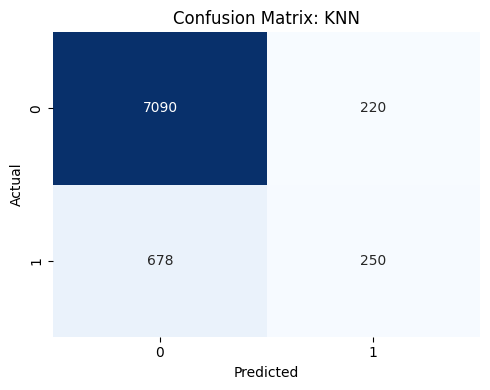

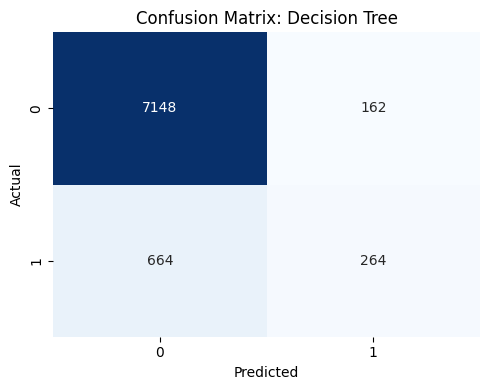

In [24]:
#######################################################################################################################
#
# Call to Plot the Confusion Matrix.
# We will skip SVM regression Model due to the time it takes and we haven't included it
# Read out eg.:
#[[7083  200]
# [ 543  691]]
################7083 clients correctly predicted as no
################200 clients incorrectly predicted as yes
################543 clients predicted as no, but actually yes → false negatives
################691 clients correctly predicted as yes
#######################################################################################################################
plot_conf_matrix(y_test, lr_best.predict(X_test_scaled), "Logistic Regression")
plot_conf_matrix(y_test, knn_best.predict(X_test_scaled), "KNN")
plot_conf_matrix(y_test, dt_best.predict(X_test), "Decision Tree")
##plot_conf_matrix(y_test, svm_best.predict(X_test_scaled), "SVM")

In [25]:
#######################################################################################################################
#
# ROC Curve (All Models) : ?? Receiver Operating Characteristics Curve
#
#######################################################################################################################
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(models, X_test_scaled, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model, X in models:
        y_probs = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("..\\GraphPlots\\ROC_Curve.png", dpi=300)
    plt.show()

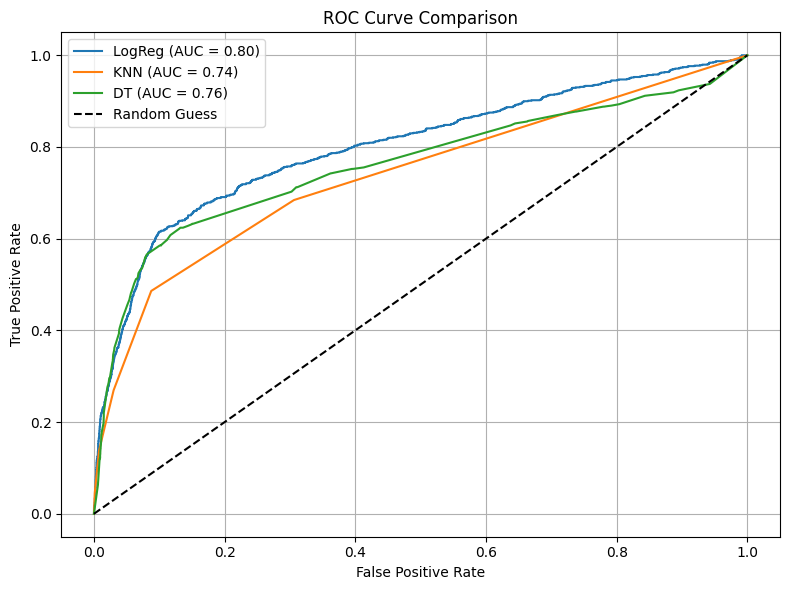

In [26]:
#######################################################################################################################
#
# Calling the function to Plot the ROC Curve
#######################################################################################################################
plot_roc_curve([
    ("LogReg", lr_best, X_test_scaled),
    ("KNN", knn_best, X_test_scaled),
    ("DT", dt_best, X_test)
    #("SVM", svm_best, X_test_scaled),
], X_test_scaled, X_test, y_test)